In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('car.csv')

In [81]:
x = df.iloc[:,:-1].values # features
y = df.iloc[:,-1].values # label

In [82]:
from sklearn.impute import SimpleImputer

missing_cols = range(7,11) # have null values
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x[:,missing_cols] = imputer.fit_transform(x[:,missing_cols])

In [83]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

category_cols = [0, 3, 4, 5, 6] # non numeric cols
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), category_cols)], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [84]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.2, random_state=9)

In [85]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(xTrain,yTrain)

LinearRegression()

In [86]:
print('train accuracy: ', np.ceil(regression.score(xTrain,yTrain)*100))
print('test accuracy',np.ceil(regression.score(xTest,yTest)*100))

train accuracy:  69.0
test accuracy 70.0


(6502, 25)
(6502,)


ValueError: x and y must be the same size

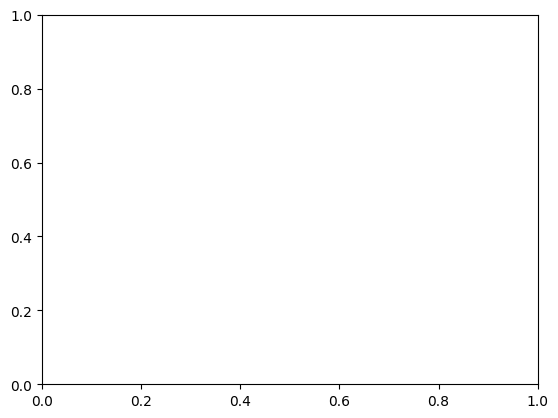

In [94]:
import matplotlib.pyplot as plt

# Scatter plot of training data
plt.scatter(xTrain[0], yTrain, color='red', label='Actual data')

# Plotting the regression line
plt.plot(xTrain[0], regression.predict(xTrain), color='blue', label='Regression line')

# Adding title and labels
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Displaying the plot
plt.legend()  # Adding legend
plt.show()
